#### HW4 - Data Science , Feature engineering 
#### Kiarash Gheisari Pour 402102302

for this assignment we're using a diabetes prediction dataset available on : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [45]:
import pandas as pd 
df = pd.read_csv('diabetes_prediction_dataset.csv')


let's see what we have in our dataset

In [46]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


no missing data!<br>
thats a good sign ; but in the smoking history column a 'No Info' label is detected , let's see how many of these no infos we have.

In [48]:
df[df['smoking_history'] == 'No Info']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
15,Male,78.0,0,0,No Info,27.32,6.6,126,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
...,...,...,...,...,...,...,...,...,...
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0


that about a third of our data!<br>
but if you pay close attention there is a 2 year old girl on the list declared as no info, let's fix that by setting the under 18's smoking_history to never. (hopefully :D)

In [49]:
df.loc[df['age']<= 18 , df.columns[4]] = 'never'

In [50]:
df[(df['age'] <=18) & (df['smoking_history'] == 'No Info')].shape

(0, 9)

now let's start our feature engineering.<br>
given the fact that all our indicators have a direct relation with diabates it doesn't make much sense to use ratio features.<br>
let's do binning for age column to label the age groups.

In [51]:
bins = [0, 18, 30, 40, 50, 60, 70, 100]  
labels = ['Child/Teen', 'Young Adult', 'Early Middle Age', 'Late Middle Age', 'Senior', 'Elderly', 'Very Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

adding another column for general heart problems seems like a good idea , we can use it later on some aggregation features

In [52]:
df['heart_problem_rate'] = df['heart_disease'] + df['hypertension']

ok , now lets do some aggregation feature engineering and add two columns averaging the heart problems for age groups and smoking status.

In [58]:
df['avg_heart_problem_rate_smoke'] = df['heart_problem_rate'].groupby(df['smoking_history']).transform('mean')
df['avg_heart_problem_rate_age'] = df['heart_problem_rate'].groupby(df['age_group']).transform('mean')

C:\Users\darkoob\AppData\Local\Temp\ipykernel_13276\2453160841.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['avg_heart_problem_rate_age'] = df['heart_problem_rate'].groupby(df['age_group']).transform('mean')


a little peek at the data won't hurt :D

In [60]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,heart_problem_rate,avg_heart_problem_rate_smoke,avg_heart_problem_rate_age
0,Female,80.0,0,1,never,25.19,6.6,140,0,Very Elderly,1,0.086986,0.336196
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Senior,0,0.095408,0.157236
2,Male,28.0,0,0,never,27.32,5.7,158,0,Young Adult,0,0.086986,0.007361
3,Female,36.0,0,0,current,23.45,5.0,155,0,Early Middle Age,0,0.136294,0.033558
4,Male,76.0,1,1,current,20.14,4.8,155,0,Very Elderly,2,0.136294,0.336196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,Very Elderly,0,0.095408,0.336196
99996,Female,2.0,0,0,never,17.37,6.5,100,0,Child/Teen,0,0.086986,0.000697
99997,Male,66.0,0,0,former,27.83,5.7,155,0,Elderly,0,0.241276,0.246604
99998,Female,24.0,0,0,never,35.42,4.0,100,0,Young Adult,0,0.086986,0.007361


very good , now let's one hot encode the non numerical columns and get ready for feature selection.

In [73]:
df2 = pd.get_dummies(df, columns=['gender' , 'smoking_history' , 'age_group'])


Bring on the mutual information!

In [75]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import numpy as np

target_column = df2.pop('diabetes')
feature_selector = SelectKBest(score_func=mutual_info_regression, k = 'all').fit(df2,target_column)

<Axes: ylabel='Feature'>

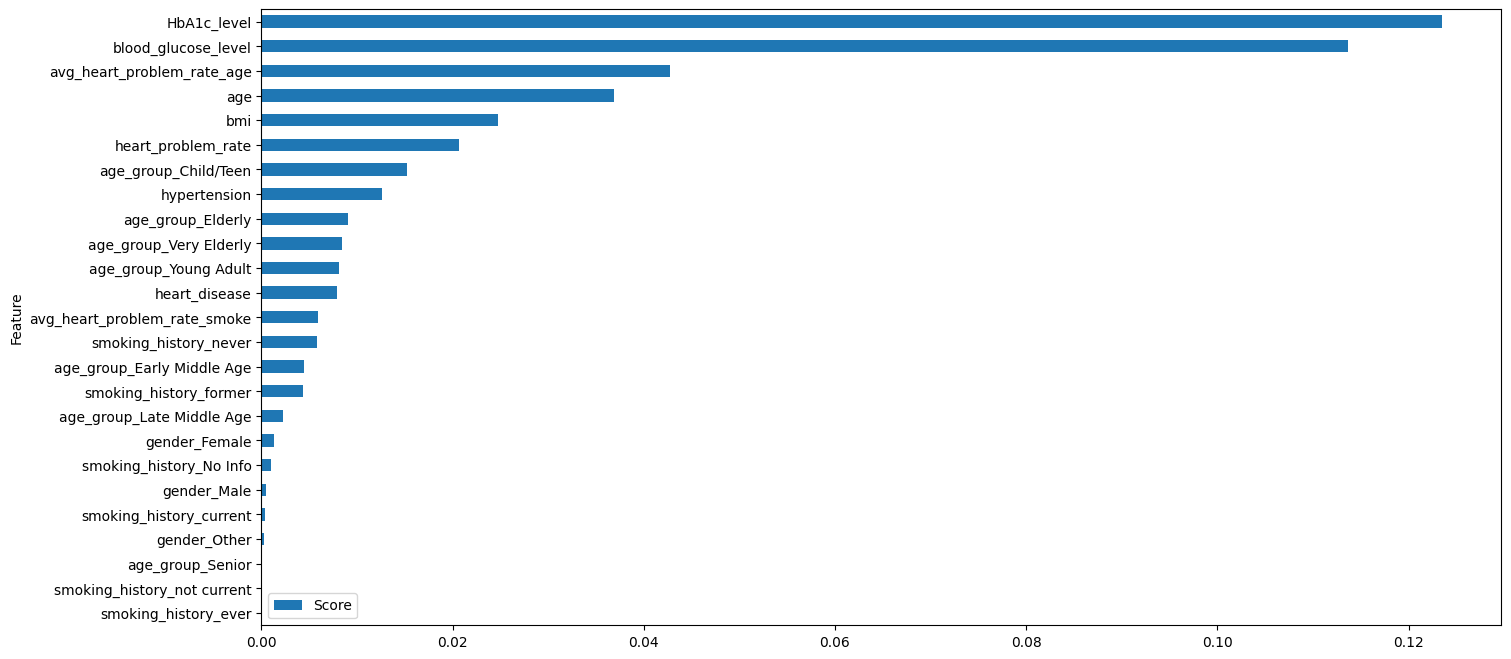

In [77]:
feature_scores = pd.DataFrame({'Feature':df2.columns,'Score':feature_selector.scores_})
feature_scores.sort_values(by=['Score'],inplace=True)

feature_scores.plot(x='Feature',y='Score',kind='barh',figsize=(16,8))

looks like one of our added features is in the top three highly informative features!

alright now let's head on to pca.

In [78]:
from sklearn.preprocessing import StandardScaler
normalized_df = StandardScaler().fit_transform(df2)

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(normalized_df)
df_pca = pd.DataFrame(data = normalized_df)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,2.561879,-0.580706,1.884893,0.841358,...,-0.320459,1.008617,-0.249269,-0.456077,-0.423636,-0.387444,-0.41339,-0.417825,-0.365417,2.555965
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,-0.330514,-0.401467,0.364926,0.841358,...,-0.320459,-0.991456,-0.249269,-0.456077,-0.423636,-0.387444,-0.41339,2.393348,-0.365417,-0.391242
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,-0.330514,-0.580706,-0.908018,-1.188554,...,-0.320459,1.008617,-0.249269,-0.456077,2.360515,-0.387444,-0.41339,-0.417825,-0.365417,-0.391242
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,-0.330514,0.468753,-0.685514,0.841358,...,-0.320459,-0.991456,-0.249269,-0.456077,-0.423636,2.581019,-0.41339,-0.417825,-0.365417,-0.391242
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,5.454271,0.468753,1.884893,-1.188554,...,-0.320459,-0.991456,-0.249269,-0.456077,-0.423636,-0.387444,-0.41339,-0.417825,-0.365417,2.555965


Text(0.5, 1.0, ' ')

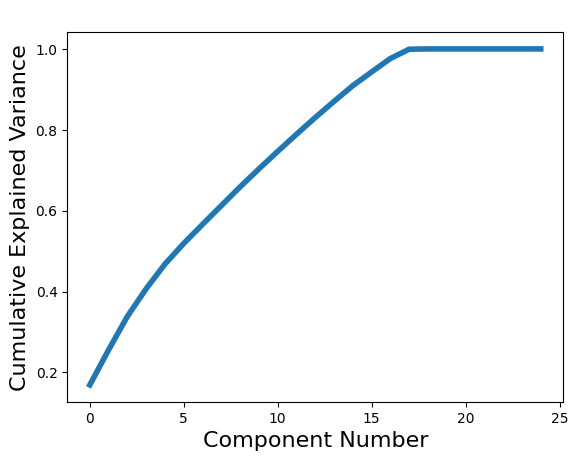

In [89]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4)
plt.xlabel('Component Number',fontsize=16)
plt.ylabel('Cumulative Explained Variance',fontsize=16)
plt.title(' ')

looks like we dont need more than 16-17 features for our analysis!

and now to answer the question : "when is feature engineering a “nice to have option” and in what situations it is a “must to have”?" <br>
well depending on the model we're using to learn from our data , feature engineering can vary from bein not neccessary to a must, for example if we have a big dataset and we're using deep learning methods the model does this work in the first layers itself but if we want to implement a linear regression model with a noisy and unstructured dataset it becomes superbly important to do feature engineering , in small datasets it's important to do this too because we dont have much to begin with so we can't feed it into a deep learning model so we have to do the feature engineering ourselves.